In [1]:
import torch
import matplotlib.pyplot as plt
from model import *
from torch.utils.data import DataLoader
from data import *
from torchvision.utils import make_grid
%matplotlib inline  

In [23]:
# Initialize the model
t_range = 500  # Number of steps
image_size = (1, 3, 32, 32)  # Example input image size (batch, channels, height, width)
img_depth = 3  # Number of channels in the image
model = DiffusionModel(in_size=32*32, t_range=t_range, img_depth=img_depth, device='cuda').to('cuda')
dataset_choice = "Cifar-10"
batch_size=8
# Example image (normalized between 0 and 1)

loader = iter(  # converting dataloader into an iterator for now.
    get_dataloader(
        dataset_name=dataset_choice,
        batch_size=batch_size,
    )
)

print(type(loader))
    

images, _ = next(loader)
print(images.shape)

Files already downloaded and verified
<class 'torch.utils.data.dataloader._SingleProcessDataLoaderIter'>
torch.Size([8, 3, 32, 32])


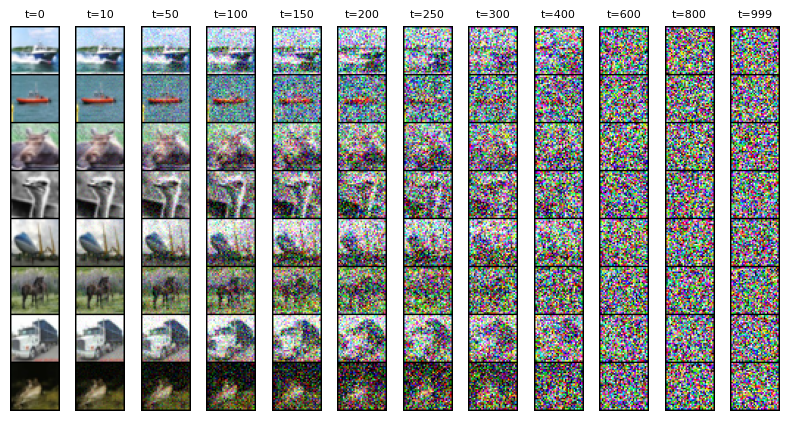

In [3]:
# Add noise for 1000 steps
noisy_images = []
steps_to_plot = [0, 10, 50, 100, 150, 200, 250, 300, 400, 600, 800, 999]
for t in steps_to_plot:
    noisy_image = model.forward_diffusion(images, t)
    noisy_image = inverse_transform(noisy_image) / 255.0
    noisy_image = make_grid(noisy_image, nrow=1, padding=1)
    noisy_images.append(noisy_image)

# Visualize the original and noisy images at a few steps
steps_to_plot = [0, 10, 50, 100, 150, 200, 250, 300, 400, 600, 800, 999]
_, ax = plt.subplots(1, len(noisy_images), figsize=(10, 5), facecolor='white')
 
for i, (timestep, noisy_sample) in enumerate(zip(steps_to_plot, noisy_images)):
    ax[i].imshow(noisy_sample.squeeze(0).permute(1, 2, 0))
    ax[i].set_title(f"t={timestep}", fontsize=8)
    ax[i].axis("off")
    ax[i].grid(False)
 
plt.axis("off")
plt.show()


torch.Size([3, 32, 32])


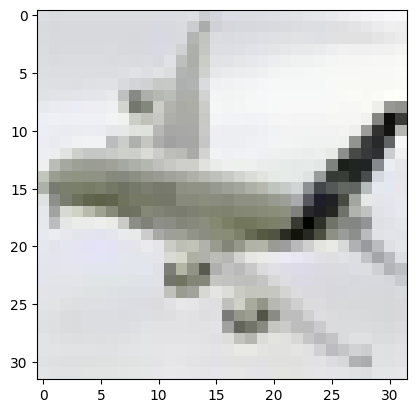

In [47]:
img = inverse_transform(images[2]).byte()
print(img.shape)
plt.imshow(img.permute(1,2,0))

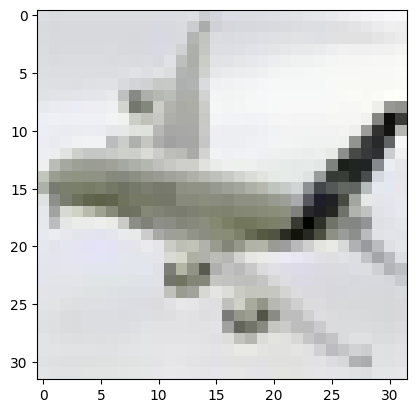

In [48]:
all_images = []

x = model.forward_diffusion(images[1], 999)
noisy_image_inverse = inverse_transform(x).byte()
all_images.append(img)
all_images.append(noisy_image_inverse)

model.load_state_dict(torch.load(f'../model_500_full_precision.pth'))

x = x.unsqueeze(0).to('cuda')

sample_steps = torch.arange(model.t_range-1, 0, -1).to('cuda')
for t in sample_steps:
    x = model.denoise_sample(x, t)

all_images.append(inverse_transform(x).byte())

plt.imshow(all_images[0].permute(1,2,0))

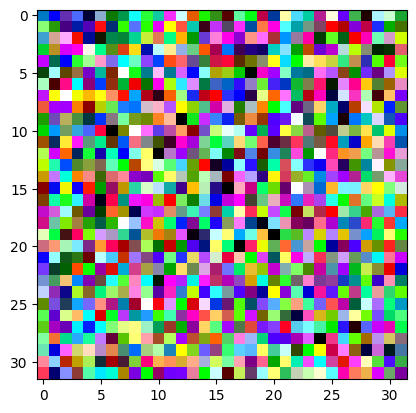

In [49]:
plt.imshow(all_images[1].permute(1,2,0))

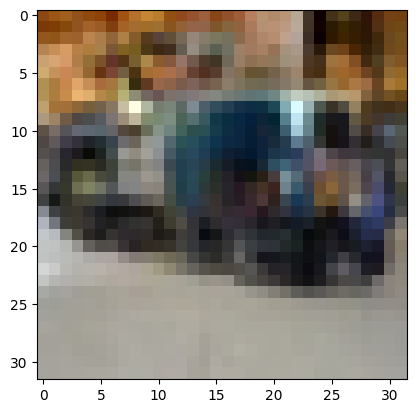

In [50]:
plt.imshow(all_images[2].cpu().squeeze(0).permute(1,2,0))